# Task: Predict house prices based on the selected features
Suggestions:
- Try polynomial features. Try tweaking the number of degrees.
- Try Ridge or Lasso regression. Try tweaking alpha.
- Try checking for overfitting with a train/test split or with K-fold.
- What happens when you use less features? What is the correlation between each feature and the target variable (price)? [hint](https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas)
- Try generating a scatter plot based on a feature (x axis), predicted prices (y axis), and ground truth prices (y axis).

References:
- Epoch 2 Notebook Solutions: [link]()
- [Pandas Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)
- [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/)
- [Matplotlib Reference](https://matplotlib.org/gallery/index.html)
- [Sci-kit Learn Reference](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from urllib.request import urlopen
file = urlopen('https://raw.githubusercontent.com/bucharestschoolofai/epoch_2/master/train.csv')
data = pd.read_csv(file, delimiter=',', usecols=['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'Fireplaces'])

data.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FullBath,Fireplaces,GarageCars,SalePrice
0,8450,7,5,2003,856,2,0,2,208500
1,9600,6,8,1976,1262,2,1,2,181500
2,11250,7,5,2001,920,2,1,2,223500
3,9550,7,5,1915,756,1,1,3,140000
4,14260,8,5,2000,1145,2,1,3,250000


In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [0]:
x = data.loc[:, :'GarageCars']
x.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FullBath,Fireplaces,GarageCars
0,8450,7,5,2003,856,2,0,2
1,9600,6,8,1976,1262,2,1,2
2,11250,7,5,2001,920,2,1,2
3,9550,7,5,1915,756,1,1,3
4,14260,8,5,2000,1145,2,1,3


In [0]:
y = data.loc[:, 'SalePrice':]
y.head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [0]:
model.fit(x.values, y.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
model.score(x.values, y.values)

0.7442121155197519

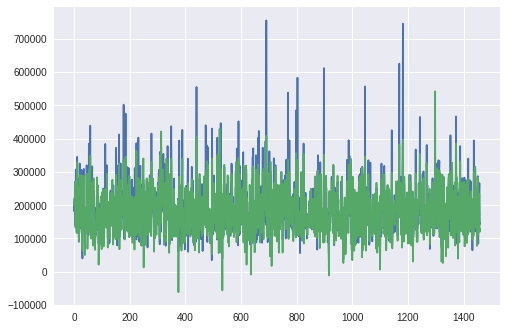

In [0]:
y_ = model.predict(x.values)
plt.plot(y.values)
plt.plot(y_)
plt.show()

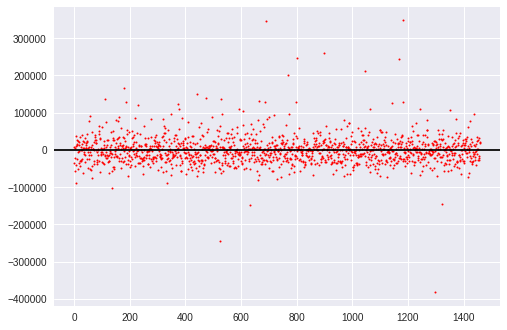

In [0]:
errors = y - y_

plt.plot(range(len(errors)), errors, 'o', c='red', markersize=2)
plt.axhline(0, c='black')